# Welcome to the beautiful tutorial of this humble repo

## Research Question:

How can we identify and characterize the distinct cell types present in a healthy human PBMC sample using integrative analysis of single-cell ATAC-seq and gene expression data?

## Expected Results:

* Cluster Identification: The preprocessing, normalization, and visualization steps are expected to reveal distinct clusters in the data, each corresponding to different cell types or states within the PBMC sample. These clusters should be distinguishable based on their gene expression and chromatin accessibility profiles.
* Machine Learning Validation: Using clustering results as labels for machine learning models should validate the initial cluster identification, demonstrating that the data contains sufficient information to accurately classify cells into their respective types and states without prior labeling.
* Expected Answer: The integrative analysis of single-cell ATAC-seq and gene expression data enables effective identification and characterization of cell types within healthy human PBMC samples, providing insights into the cellular composition and functional states of immune cells in a healthy individual.

Use the cell below to download data (<50 mb in total)

In [4]:
!mkdir -p data
!wget -O data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5 https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
!wget -O data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv

If on Windows or command did not do anything, use this

In [3]:
%%bash
mkdir -p data
wget -O data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5 https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
wget -O data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv

--2024-04-10 13:57:14--  https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 172.64.32.122, 173.245.58.122, 108.162.192.122, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|172.64.32.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38844318 (37M) [binary/octet-stream]
Saving to: ‘data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5’

     0K .......... .......... .......... .......... ..........  0% 2.51M 15s
    50K .......... .......... .......... .......... ..........  0% 6.88M 10s
   100K .......... .......... .......... .......... ..........  0% 3.84M 10s
   150K .......... .......... .......... .......... ..........  0% 5.76M 9s
   200K .......... .......... .......... .......... ..........  0% 15.4M 8s
   250K .......... .......... .......... .......... ..........  0% 16.2M 7s
   300K .......... ...

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../scgog/')

In [2]:
from data_preprocessing import *
from visualization import *
from data_loader import *
from benchmarking_ml_models import *

Let's preprocess the data

In [3]:
data_path = "data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5"
ann_path = "data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv"
mdata = preprocess_omics_data(data_path, ann_path)

Added `interval` annotation for features from data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
After reading object has  2711 observations 134920 variables
After make_unique object has  2711 observations 134920 variables
After quality control object has  2391 observations 134920 variables
After normalization object has  2391 observations 134920 variables
After merging with annotation object has  2391 observations 134920 variables


The cornerstone of my project is the understanding that data preprocessing and preparation are paramount in any machine learning pipeline. From my experience, about 90% of a model's performance metrics can be attributed to how well the dataset is processed from its raw form. This meticulous preparation not only sets the stage but also amplifies the potential applications of machine learning. Once the data is correctly prepared, the possibilities become vast: from predicting cluster labels to validate the accuracy of clustering, to forecasting types of ATAC peaks and gene expressions. These predictions hinge on various transformations of count data, as well as analyses based on nucleotide sequences aligned with the locations of peaks or genes. Thus, effective data preparation not only enhances model accuracy but also broadens the scope of potential insights and applications in genomic research.

# From here you can do any of these two

1. Clustering and creating figure of it

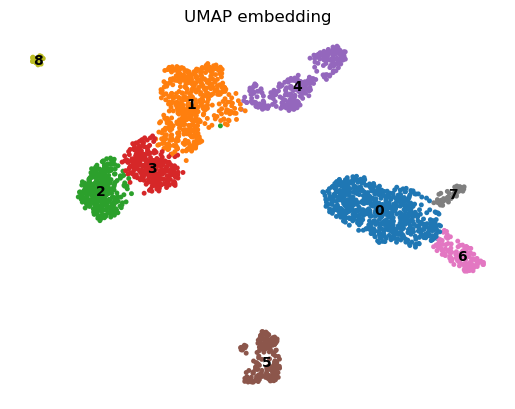

In [4]:
# Would you like compilated figure to be saved? If not, it will be only shown here, but you can copy it from notebook.
saved = False
file_path = visualize_umap(mdata, saved)

2. Clustering and benchmarking ML models

In [4]:
test_size = 0.35
random_state = 42

benchmark_models(mdata, test_size, random_state)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.733333   0.820613  0.733333  0.730093
1    Gradient Boosting  0.622222   0.737892  0.622222  0.639603
2                  SVC  0.333333   0.111111  0.333333  0.166667
3  Logistic Regression  0.777778   0.853914  0.777778  0.787366
